## Cache Plots

In [7]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import seaborn as sns

def plot(p_data, p_yId, p_xId, p_hueId, p_styleId, p_logScale=False, p_notiling_marker=False, p_notiling_value=0, p_export_filename=None, p_xLabel=None, p_yLabel=None):
    rcParams['figure.figsize'] = 12,8
    rcParams['font.size'] = 12
    rcParams['svg.fonttype'] = 'none'
    plot = sns.lineplot(x=p_xId,
                        y=p_yId,
                        hue=p_hueId,
                        style=p_styleId,
                        data=p_data)
    if p_logScale == True:
        plot.set_yscale('log')
        plot.set_xscale('log')
    
    
    if p_xLabel != None:
        plot.set(xlabel=p_xLabel)
    else:
        plot.set(xlabel=p_xId)

    if p_yLabel != None:
        plot.set(ylabel=p_yLabel)
    else:
        plot.set(ylabel=p_yId)


    plt.grid(color='gainsboro')
    plt.grid(True,which='minor', linestyle='--', linewidth=0.5, color='gainsboro') 

    if(p_notiling_marker == True):
        plt.axhline(p_notiling_value, linestyle='--', color='red', label='\Verb{notiling}')

    plt.legend(title='TS_xz')

    if(p_export_filename != None):
        plt.savefig(p_export_filename)

    plt.show()

### Gauss3

### Runtime as a function of tiling

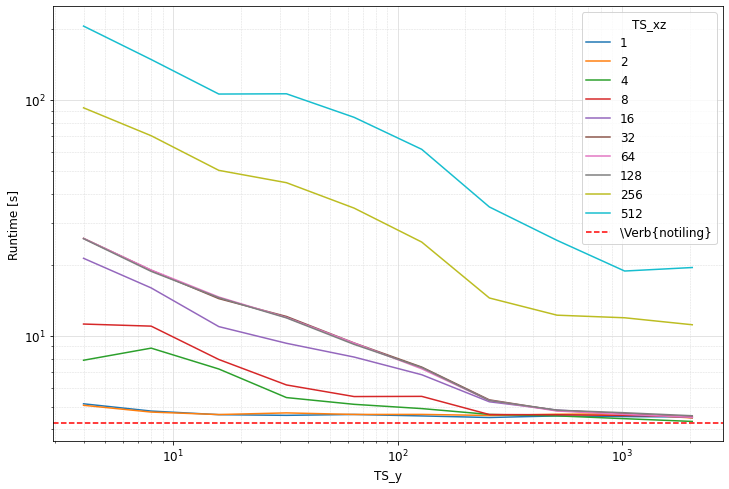

In [8]:
import pandas as pd

data_frame = pd.read_csv('./e_runtime_tiling.csv')
data_frame = data_frame[data_frame.region_id == 'apply']
data_frame = data_frame[data_frame.impl_id == 'linear_stencil_noedgecases_tiling']
data_frame = data_frame[data_frame.tiling_cols < 65536]
data_frame = data_frame[data_frame.tiling_rows < 1024]
data_frame['tiling_rows'] = data_frame['tiling_rows'].map(str)

plot(p_data=data_frame,
    p_yId='runtime',
    p_xId='tiling_cols',
    p_hueId='tiling_rows',
    p_styleId=None,
    p_logScale=True,
    p_notiling_marker=True,
    p_notiling_value=4.27924,
    p_export_filename='runtime_tiling.svg',
    p_xLabel="TS_y",
    p_yLabel="Runtime [s]")